# Python for Spatial Analysis
## Second part of the module of GG3209 Spatial Analysis with GIS.
### Notebook to practice GeoPandas - Exercises

---
Dr Fernando Benitez -  University of St Andrews - School of Geography and Sustainable Development - First Iteration 2023 v.1.0 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import contextily as ctx
import rasterio as rio
from rasterio import plot

plt.rcParams['figure.figsize'] = [10, 8]

/var/folders/sd/qyhv6g4d0qn86cc_90yj2t5m0000gn/T/ipykernel_1457/2684456056.py:5: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


## 3.1 Practicing GeoPandas 

In the folder London Data you will find a shapefile representing the LSOA polygns with the population from the latest census 2021,  **data\london_data\Census2o_LSOA.shp** . For example, the column "Pop20" contains population counts for each LSOA area. For this excersice you need to create and wirte the code for the following challenges.

Read the **Census2o_LSOA.shp** layer into a GeoDataFrame.

- Subset the following columns (plus the geometry!):

    * LSOA11CD --> LSOA area code
    * LSOA11NM --> LSOA area name 
    * LSOA11NMW --> LSOA bigger area
    * Pop20 -->  Population counts

- What is the Coordinate Reference System of the layer? 

- How many features does the layer contain? Write an expression that returns the result as int.

- The values in the "LSOA11CD" column (code area ID) should all be unique. How can you make sure? Either use one of the methods we learned earlier, or search online (e.g., google “pandas check for duplicates”).

- Plot the layer using the .plot method

- Plot the layer using the .explorer method

- Subset just the LSOA areas with Pop20 counts greater than 1500.

- Plot the resulting subset, using symbology according to total population size, i.e., the "Pop_Total" column, and using a sequentual color map such as "Reds".

- How many areas are there with the requested population? (hint: shape)

- What is the total population of the subset layer? (hint: sum)

In [10]:
london_data = gpd.read_file('data/london_data/Census2o_LSOA.shp')
london_data.crs


<Derived Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [14]:
GDF1 = london_data[["LSOA11CD","LSOA11NM","LSOA11NMW","Pop20"]]
GDF1

LSOA11CD                   LSOA11NM                  LSOA11NMW   Pop20
0     E01000001        City of London 001A        City of London 001A  1749.0
1     E01000002        City of London 001B        City of London 001B  1678.0
2     E01000003        City of London 001C        City of London 001C  1900.0
3     E01000005        City of London 001E        City of London 001E  2181.0
4     E01000006  Barking and Dagenham 016A  Barking and Dagenham 016A  2117.0
...         ...                        ...                        ...     ...
3915  E01033742             Greenwich 007F             Greenwich 007F  1705.0
3916  E01033743             Greenwich 002H             Greenwich 002H  2330.0
3917  E01033744             Greenwich 007G             Greenwich 007G  1810.0
3918  E01033745             Greenwich 002I             Greenwich 002I  1987.0
3919  E01033746             Greenwich 038E             Greenwich 038E  1389.0

[3920 rows x 4 columns]

In [19]:
GDF1.shape

(3920, 4)

In [22]:
GDF1["LSOA11CD"].duplicated

<bound method Series.duplicated of 0       E01000001
1       E01000002
2       E01000003
3       E01000005
4       E01000006
          ...    
3915    E01033742
3916    E01033743
3917    E01033744
3918    E01033745
3919    E01033746
Name: LSOA11CD, Length: 3920, dtype: object>

<AxesSubplot: >

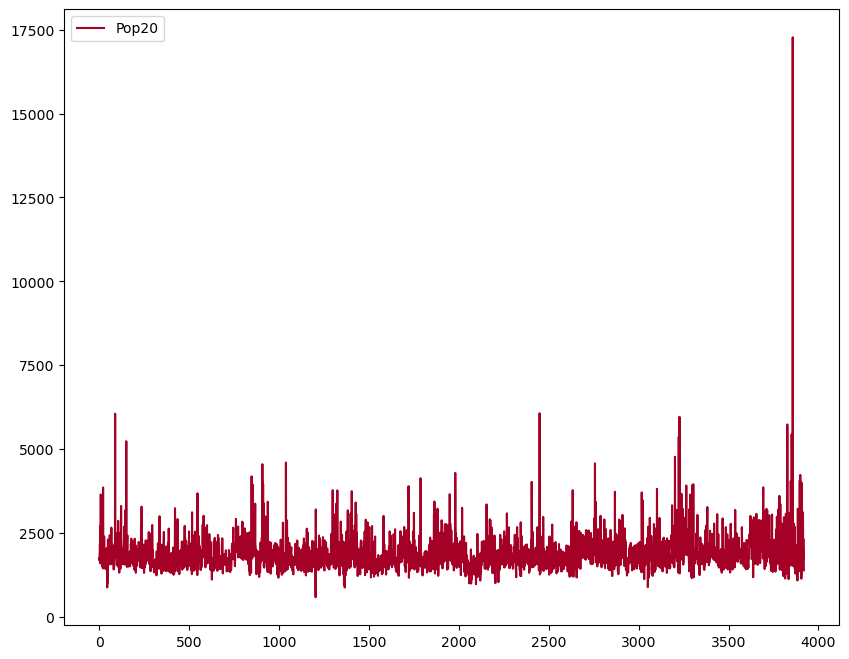

In [26]:
GDF1.plot(column="LSOA11CD")

In [34]:
london_data.explore(column="Pop20", cmap='RdYlBu')

LSOA11CD                   LSOA11NM                  LSOA11NMW   BNG_E  \
0     E01000001        City of London 001A        City of London 001A  532129   
1     E01000002        City of London 001B        City of London 001B  532480   
2     E01000003        City of London 001C        City of London 001C  532245   
3     E01000005        City of London 001E        City of London 001E  533581   
4     E01000006  Barking and Dagenham 016A  Barking and Dagenham 016A  544994   
...         ...                        ...                        ...     ...   
3914  E01033741             Greenwich 002G             Greenwich 002G  545454   
3915  E01033742             Greenwich 007F             Greenwich 007F  544575   
3916  E01033743             Greenwich 002H             Greenwich 002H  545669   
3917  E01033744             Greenwich 007G             Greenwich 007G  544561   
3918  E01033745             Greenwich 002I             Greenwich 002I  546105   

       BNG_N      LONG       LAT    Shape__Are   Shape__Len  \
0     181625 -0.097060  51.51810  1.333250e+05  2291.187925   
1     181699 -0.091970  51.51868  2.262100e+05  2488.086900   
2     182036 -0.095230  51.52176  5.728533e+04  1142.242230   
3     181265 -0.076280  51.51452  1.907474e+05  2167.872156   
4     184276  0.089318  51.53876  1.441954e+05  1935.412725   
...      ...       ...       ...           ...          ...   
3914  179677  0.094050  51.49732  5.714824e+05  3943.134500   
3915  179604  0.081366  51.49689  1.232993e+05  1831.851076   
3916  180548  0.097505  51.50509  1.004846e+06  5237.064157   
3917  179303  0.081041  51.49419  1.510930e+05  2111.107937   
3918  179884  0.103508  51.49901  5.584827e+05  4193.833411   

                                  GlobalID  \
0     e87faa35-c559-4230-93be-8484ab490f70   
1     f0e3338a-e889-49be-8ca4-c7f2de90afd6   
2     a3512b47-41ae-4703-8264-c7cc44db1b37   
3     b62f5c70-737d-4936-9c85-eef139fce72f   
4     f74c0183-63f6-4468-b58d-577339257dea   
...                                    ...   
3914  359ce89a-9b40-4774-8e80-1a3d1272bd95   
3915  34150baa-6def-4795-abc0-08ebaef265a0   
3916  bc2b8413-91bb-4f39-b48e-cbf02452ea38   
3917  3927bc25-ef7c-4788-a995-3be27152bbdc   
3918  d1abbacd-9d50-4c93-9bec-e89311eb2a2d   

                                              MERGE_SRC   Shape_Leng  \
0     LSOA__Dec_2011__Boundaries_Generalised_Clipped...  2291.187925   
1     LSOA__Dec_2011__Boundaries_Generalised_Clipped...  2488.086900   
2     LSOA__Dec_2011__Boundaries_Generalised_Clipped...  1142.242230   
3     LSOA__Dec_2011__Boundaries_Generalised_Clipped...  2167.872156   
4     LSOA__Dec_2011__Boundaries_Generalised_Clipped...  1935.412725   
...                                                 ...          ...   
3914  LSOA__Dec_2011__Boundaries_Generalised_Clipped...  3943.134500   
3915  LSOA__Dec_2011__Boundaries_Generalised_Clipped...  1831.851076   
3916  LSOA__Dec_2011__Boundaries_Generalised_Clipped...  5237.064157   
3917  LSOA__Dec_2011__Boundaries_Generalised_Clipped...  2111.107937   
3918  LSOA__Dec_2011__Boundaries_Generalised_Clipped...  4193.833411   

        Shape_Area  LSOA_Code                  LSOA_Name   Pop20  ObjectID  \
0     1.333250e+05  E01000001        City of London 001A  1749.0     28010   
1     2.262100e+05  E01000002        City of London 001B  1678.0     28011   
2     5.728533e+04  E01000003        City of London 001C  1900.0     28012   
3     1.907474e+05  E01000005        City of London 001E  2181.0     28013   
4     1.441954e+05  E01000006  Barking and Dagenham 016A  2117.0     28016   
...            ...        ...                        ...     ...       ...   
3914  5.714824e+05  E01033741             Greenwich 002G  3119.0     29730   
3915  1.232993e+05  E01033742             Greenwich 007F  1705.0     29731   
3916  1.004846e+06  E01033743             Greenwich 002H  2330.0     29732   
3917  1.510930e+05  E01033744             Greenwich 007G  1810.0     29733   
3

## 3.2 Practicing Rasterio

Import rasterio under the alias `rio`.


In [1]:
# codes goes here

Download the following raster image, and then write the required code to accomplish the following challenges.

https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/046/027/LC08_L1TP_046027_20181224_20190129_01_T1/LC08_L1TP_046027_20181224_20190129_01_T1_B8.TIF

- Read the file as a rasterio dataset
- What is the CRS of the dataset?
- What is the raster extent (bounds) of the dataset in projected coordinates?
- How many bands are there in this dataset?
- Create a plot of the image
- Create a Histograms from the raster
- Using EarthPy create a plot of false color



## Well done!

If you have finished **Python_DataViz, Python_GeoPandas and the Exercises**, make sure you commit and push all changes to your cloned repository in GutHub. That will ensure all your practice is secure in the cloud.